In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Fetching the data

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

In [ ]:
mnist = fetch_openml('mnist_784', version=1, parser="auto") #This returns a bunch object (something like dictionary) that is compatible with sklearn

## Exploring the data

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist['data'].head()

In [ ]:
mnist['target'].head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
mnist['frame'].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
mnist['feature_names']

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [ ]:
mnist['target_names']

['class']

In [ ]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
mnist['details']

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [ ]:
mnist['url']

'https://www.openml.org/d/554'

## Pre-Processing the data

In [ ]:
print("""We are using:\n
1. Stochastic Gradient Descent (SGD) Classifier: It is a linear classifier that uses stochastic gradient descent as the optimization algorithm. This model is suitable for large-scale and sparse datasets.

2. Random Forest Classifier: It is an ensemble learning method that combines multiple decision trees to make predictions. It is known for its versatility, robustness, and ability to handle complex datasets.

3. Support Vector Classifier (SVC): It is a powerful classification algorithm that finds the best hyperplane to separate different classes. It can handle both linear and non-linear classification tasks by using different kernels.

4. K-Nearest Neighbors (KNN) Classifier: It is a non-parametric algorithm that assigns a class label to an instance based on the class labels of its nearest neighbors. It is simple and intuitive, making it a popular choice for classification tasks.

""")

We are using:

1. Stochastic Gradient Descent (SGD) Classifier: It is a linear classifier that uses stochastic gradient descent as the optimization algorithm. This model is suitable for large-scale and sparse datasets.

2. Random Forest Classifier: It is an ensemble learning method that combines multiple decision trees to make predictions. It is known for its versatility, robustness, and ability to handle complex datasets.

3. Support Vector Classifier (SVC): It is a powerful classification algorithm that finds the best hyperplane to separate different classes. It can handle both linear and non-linear classification tasks by using different kernels.

4. K-Nearest Neighbors (KNN) Classifier: It is a non-parametric algorithm that assigns a class label to an instance based on the class labels of its nearest neighbors. It is simple and intuitive, making it a popular choice for classification tasks.




In [ ]:
# By default Scikit-Learn caches downloaded datasets in a directory called $HOME/scikit_learn_data.

In [ ]:
# Extract the full training set and test set
X_train_full = mnist.data[:60000]
y_train_full = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [ ]:
# For smaller training training time use smaller data set
'''
# Create a smaller stratified training subset (Just for smaller training time)
from sklearn.model_selection import train_test_split

# Step: Create a stratified subset of 10,000 samples and keep the rest for future training
X_train_subset, X_train_rest, y_train_subset, y_train_rest = train_test_split(X_train_full, y_train_full, train_size=10000, test_size=50000, stratify=y_train_full, random_state=42)

# This will ensure that rest 50K samples are different from the first 10K subset
# Took a lot of time though!
'''

'\n# Create a smaller stratified training subset (Just for smaller training time)\nfrom sklearn.model_selection import train_test_split\n\n# Step: Create a stratified subset of 10,000 samples and keep the rest for future training\nX_train_subset, X_train_rest, y_train_subset, y_train_rest = train_test_split(X_train_full, y_train_full, train_size=10000, test_size=50000, stratify=y_train_full, random_state=42)\n\n# This will ensure that rest 50K samples are different from the first 10K subset\n# Took a lot of time though!\n'

In [ ]:
# # Print the shapes to verify the sizes
# print("Stratified Subset shape:", X_train_subset.shape, y_train_subset.shape)
# print("Rest of the Data shape:", X_train_rest.shape, y_train_rest.shape)


In [ ]:
# Except RFC all others require scaling of data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
y_train_full.iloc[0]

'5'

In [ ]:
type(y_train_full.iloc[0])

str

In [ ]:
y_train_full = y_train_full.astype(np.uint8)

In [ ]:
y_train_full.iloc[0]

5

In [ ]:
type(y_train_full.iloc[0]) #Nice!

numpy.uint8

In [ ]:
print("Shape of full training set: ", X_train_full.shape)
print("Shape of full training set (Scaled): ", X_train_full_scaled.shape)
print("Shape of full training-target set: ", y_train_full.shape)
print()
print("Shape of test set: ", X_test.shape)
print("Shape of test set (Scaled): ", X_test_scaled.shape)
print("Shape of test-target set: ", y_test.shape)

Shape of full training set:  (60000, 784)
Shape of full training set (Scaled):  (60000, 784)
Shape of full training-target set:  (60000,)

Shape of test set:  (10000, 784)
Shape of test set (Scaled):  (10000, 784)
Shape of test-target set:  (10000,)


### Visualizing the data

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.values.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show();

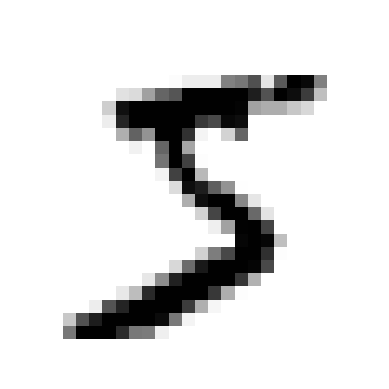

Saving figure some_digit_plot


<Figure size 640x480 with 0 Axes>

In [ ]:
some_digit = X_train_full.iloc[0]

plot_digit(some_digit);
save_fig("some_digit_plot");

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")


Saving figure more_digits_plot


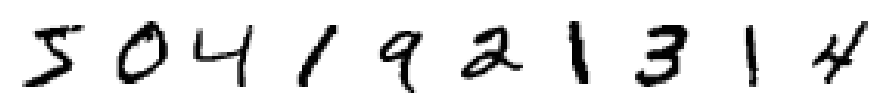

In [ ]:
plt.figure(figsize=(9,9))
example_images = X_train_full[:10]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

Saving figure more_digits_plot


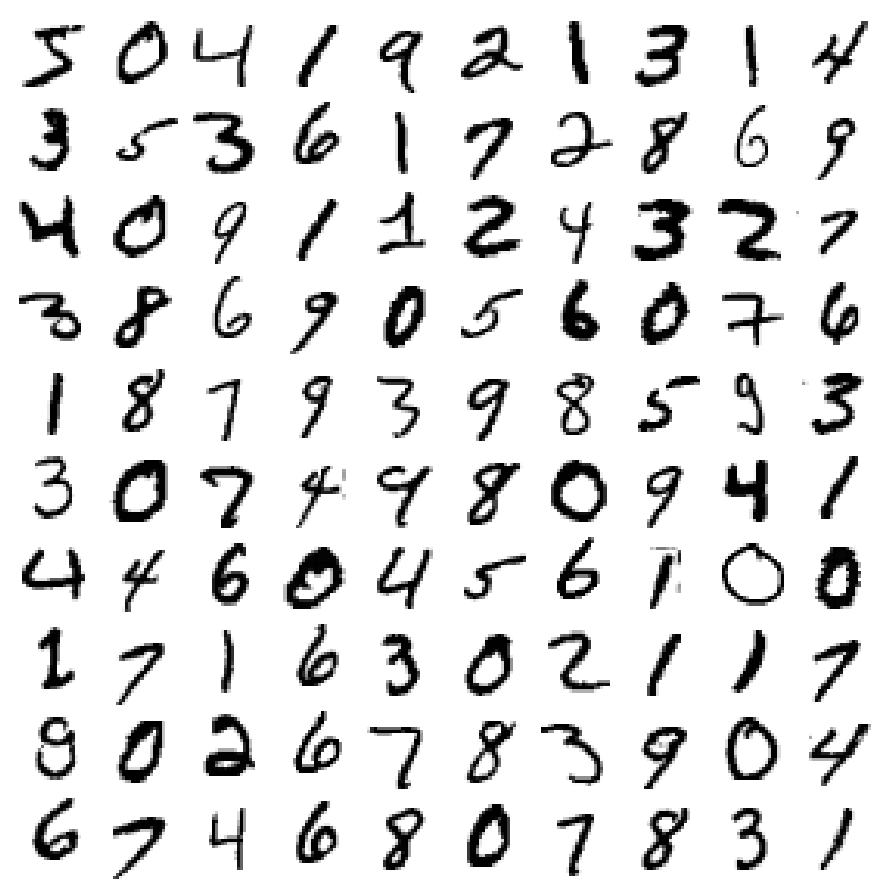

In [ ]:
plt.figure(figsize=(9,9))
example_images2 = X_train_full[:100]
plot_digits(example_images2, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [ ]:
# Now it's time to train some models

# Training Models

## 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

### Random Forest - OvO

In [ ]:
ovo_rf_clf = OneVsOneClassifier(rf_clf)

In [ ]:
# Setting some hyperparameters

In [ ]:
param_grid_ovo = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__max_features': ['sqrt', 'log2', None],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__bootstrap': [True, False]
}

In [ ]:
grid_search_ovo_rf_clf = GridSearchCV(ovo_rf_clf, param_grid_ovo, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search_ovo_rf_clf.fit(X_train_full, y_train_full)

/home/test/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
print("OVO - Best Hyperparameters:", grid_search_ovo_rf_clf.best_params_)
print("OVO - Best Score:", grid_search_ovo_rf_clf.best_score_)

### Random Forest - OvR

In [ ]:
ovr_rf_clf = OneVsRestClassifier(rf_clf, n_jobs=-1, verbose=3)

In [ ]:
param_grid_ovr = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__max_features': ['sqrt', 'log2', None],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__bootstrap': [True, False]
}

In [ ]:
grid_search_ovr_rf_clf = GridSearchCV(ovr_rf_clf, param_grid_ovr, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

In [ ]:
ovr_rf_clf.fit(X_train_full, y_train_full)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.5min finished


OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1,
                                                     random_state=42),
                    n_jobs=-1, verbose=3)

In [ ]:
print("OVR - Best Hyperparameters:", grid_search_ovr_rf_clf.best_params_)
print("OVR - Best Score:", grid_search_ovr_rf_clf.best_score_)


AttributeError: ignored

In [ ]:
# Save the trained model
import joblib


joblib.dump(ovr_rf_clf, 'ovr_rf_clf.pkl')

['ovr_rf_clf.pkl']

In [ ]:
ovr_rf_clf.predict([X_train_full.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

array([5], dtype=uint8)

In [ ]:
ovr_rf_clf

### Random Forest - OvO

In [ ]:
ovo_rf_clf = OneVsOneClassifier(rf_clf, n_jobs=-1)

In [ ]:
param_grid_ovr = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__max_features': ['sqrt', 'log2', None],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__bootstrap': [True, False]
}

In [ ]:
grid_search_ovr_rf_clf = GridSearchCV(ovr_rf_clf, param_grid_ovr, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

In [ ]:
ovo_rf_clf.fit(X_train_full, y_train_full)

OneVsOneClassifier(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1)

In [ ]:
print("OVR - Best Hyperparameters:", grid_search_ovr_rf_clf.best_params_)
print("OVR - Best Score:", grid_search_ovr_rf_clf.best_score_)


AttributeError: ignored

In [ ]:
# Save the trained model
import joblib


joblib.dump(ovo_rf_clf, 'ovo_rf_clf.pkl')

['ovo_rf_clf.pkl']